In [168]:
import scanpy as sc
import cellhint
import pandas as pd

In [169]:
adata = sc.read("../../processed_data/annotation_harmonization/20250119_mes_anno.h5ad")

In [170]:
adata.obs["orig.ident"].value_counts()

orig.ident
Tooth_Zheng_M2          18717
Tooth_Zheng_M1          16000
ToothNc_Junjun_E14.5    14616
ToothNc_Junjun_E16.5    12626
ToothNc_Junjun_E13.5    11535
ToothNc_Junjun_P3.5     11282
ToothNc_Junjun_P7.5      7073
SS2                      1397
Name: count, dtype: int64

In [171]:
adata.obs["datasets"] = adata.obs["orig.ident"].copy()

In [172]:
adata.obs["datasets"][adata.obs["datasets"].isin(["Tooth_Zheng_M2","Tooth_Zheng_M1"])] = "Tooth_Zheng_M1"

/tmp/ipykernel_2475982/231945563.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [173]:
adata.X[0:5,0:5].toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [174]:
del adata.var

In [182]:
np.sum(adata.obs.curate_anno.isna())

1397

In [185]:
adata[adata.obs.curate_anno.isna()].obs

,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,integrated_snn_res.0.5,seurat_clusters,curate_anno,label,RNA_snn_res.0.5,ident,datasets
SS2_16_015_A10_2,SS2,275054.0,5576,NaN,NaN,2,NaN,Maturing pulp,2,2,SS2
SS2_16_015_A15_2,SS2,2318689.0,6039,NaN,NaN,3,NaN,Distal pulp,3,3,SS2
SS2_16_015_A16_2,SS2,246606.0,3987,NaN,NaN,3,NaN,Distal pulp,3,3,SS2
SS2_16_015_A18_2,SS2,118256.0,3281,NaN,NaN,0,NaN,Apical pulp,0,0,SS2
SS2_16_015_A21_2,SS2,165643.0,3323,NaN,NaN,0,NaN,Apical pulp,0,0,SS2
...,...,...,...,...,...,...,...,...,...,...,...
SS2_17_014_P12_2,SS2,486702.0,5733,NaN,NaN,1,NaN,Pre-odontoblasts,1,1,SS2
SS2_17_014_P3_2,SS2,531301.0,5341,NaN,NaN,3,NaN,Distal pulp,3,3,SS2
SS2_17_014_P6_2,SS2,397778.0,6500,NaN,NaN,8,NaN,Pre-odontoblasts,8,8,SS2
SS2_17_014_P8_2,SS2,376889.0,5458,NaN,NaN,2,NaN,Apical pulp,2,2,SS2


In [175]:
adata.obs["datasets"] = adata.obs["datasets"].astype("str")

In [176]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key = 'datasets', subset = True)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'datasets' as categorical
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



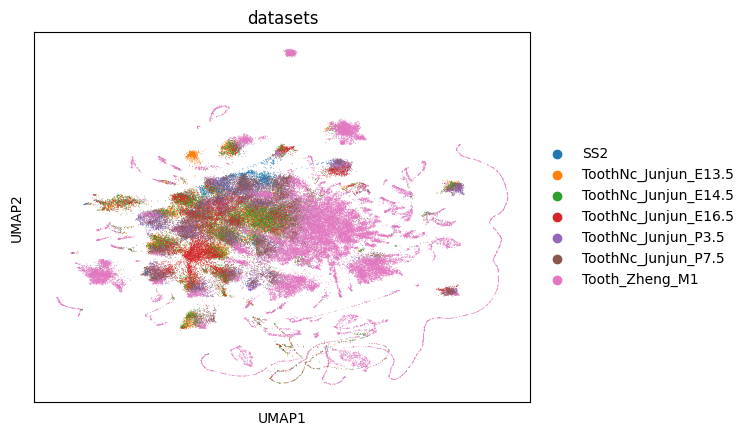

In [177]:
sc.pl.umap(adata,color = "datasets")

... storing 'curate_anno' as categorical


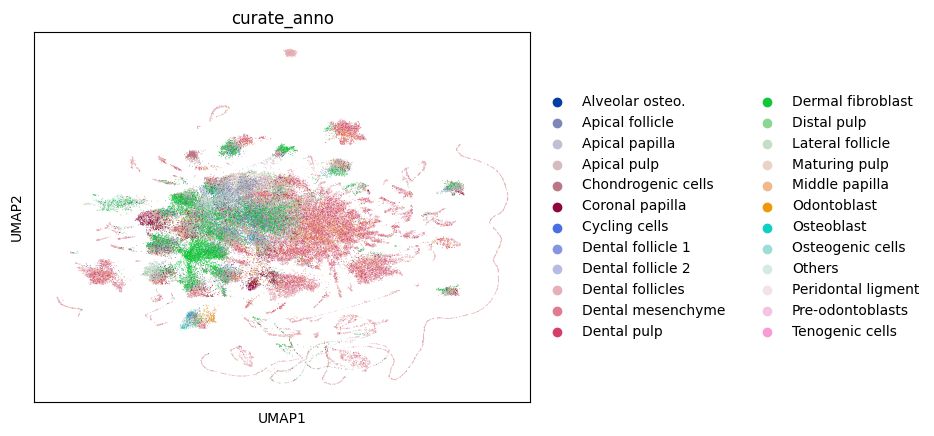

In [190]:
sc.pl.umap(adata,color = "curate_anno")

In [187]:
adata.obs["curate_anno"] = adata.obs["curate_anno"].astype(str)

In [188]:
adata.obs["curate_anno"][~adata.obs["label"].isna()]

SS2_16_015_A10_2    nan
SS2_16_015_A15_2    nan
SS2_16_015_A16_2    nan
SS2_16_015_A18_2    nan
SS2_16_015_A21_2    nan
                   ... 
SS2_17_014_P12_2    nan
SS2_17_014_P3_2     nan
SS2_17_014_P6_2     nan
SS2_17_014_P8_2     nan
SS2_17_014_P9_2     nan
Name: curate_anno, Length: 1397, dtype: object

In [63]:
adata.obs["label"][~adata.obs["label"].isna()]

SS2_16_015_A10_2             Maturing pulp
SS2_16_015_A15_2               Distal pulp
SS2_16_015_A16_2               Distal pulp
SS2_16_015_A18_2               Apical pulp
SS2_16_015_A21_2               Apical pulp
                                ...       
TTTGTTGTCATTACCT-1_2_3    Dental follicles
TTTGTTGTCCTGCTAC-1_2_3         Dental pulp
TTTGTTGTCGGAATTC-1_2_3    Dental follicles
TTTGTTGTCGGCTATA-1_2_3    Dental follicles
TTTGTTGTCTTTCGAT-1_2_3    Dental follicles
Name: label, Length: 40758, dtype: category
Categories (11, object): ['Alveolar osteo.', 'Apical pulp', 'Dental follicle 1', 'Dental follicle 2', ..., 'Maturing pulp', 'Odontoblast', 'Peridontal ligment', 'Pre-odontoblasts']

In [189]:
adata.obs["curate_anno"][~adata.obs["label"].isna()] = adata.obs["label"][~adata.obs["label"].isna()]

/tmp/ipykernel_2475982/873712498.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_2475982/873712498.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [47]:
adata.obs["curate_anno"][adata.obs["curate_anno"].isna()] = adata.obs["label"][adata.obs["curate_anno"].isna()]

/tmp/ipykernel_2475982/1996873331.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs["curate_anno"][adata.obs["curate_anno"].isna()] = adata.obs["label"][adata.obs["curate_anno"].isna()]
/tmp/ipykernel_2475982/1996873331.py:1: Set

... storing 'curate_anno' as categorical


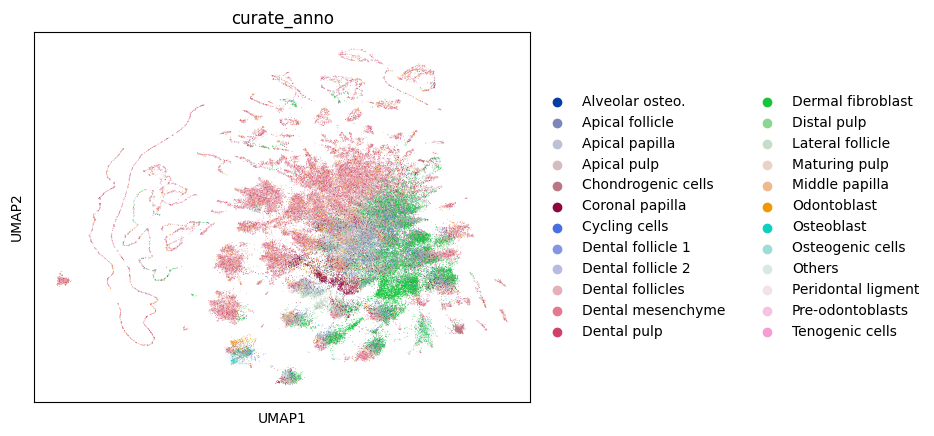

In [66]:
sc.pl.umap(adata,color = "curate_anno")

In [191]:
alignment = cellhint.harmonize(adata, 'datasets', 'curate_anno')

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of ToothNc_Junjun_E14.5 and Tooth_Zheng_M1
🖇 Harmonizing cell types of ToothNc_Junjun_P3.5
🖇 Harmonizing cell types of ToothNc_Junjun_E13.5
🖇 Harmonizing cell types of ToothNc_Junjun_E16.5
🖇 Harmonizing cell types of ToothNc_Junjun_P7.5
🖇 Harmonizing cell types of SS2
🖋️ Reannotating cells
✅ Harmonization done!


In [192]:
alignment

Cross-dataset cell type alignment for 7 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'ToothNc_Junjun_E14.5', 'Tooth_Zheng_M1', 'ToothNc_Junjun_P3.5', 'ToothNc_Junjun_E13.5', 'ToothNc_Junjun_E16.5', 'ToothNc_Junjun_P7.5', 'SS2'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [193]:
alignment.write('../../process/annotation/20250114_annotation_harmonized/20250120_cellhint_mes_alignment.pkl')

In [194]:
alignmentTb = cellhint.DistanceAlignment.load('../../process/annotation/20250114_annotation_harmonized/20250120_cellhint_mes_alignment.pkl')

In [195]:
alignmentTb

Cross-dataset cell type alignment for 7 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'ToothNc_Junjun_E14.5', 'Tooth_Zheng_M1', 'ToothNc_Junjun_P3.5', 'ToothNc_Junjun_E13.5', 'ToothNc_Junjun_E16.5', 'ToothNc_Junjun_P7.5', 'SS2'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [196]:
alignment.relation.head(10)

,ToothNc_Junjun_E14.5,relation,Tooth_Zheng_M1,relation,ToothNc_Junjun_P3.5,relation,ToothNc_Junjun_E13.5,relation,ToothNc_Junjun_E16.5,relation,ToothNc_Junjun_P7.5,relation,SS2
0,Cycling cells,∋,Dental pulp,=,UNRESOLVED,=,UNRESOLVED,∈,Osteoblast,∈,Apical papilla,=,NONE
1,Dental mesenchyme,∋,Odontoblast,∈,Middle papilla,=,NONE,=,NONE,=,UNRESOLVED,=,NONE
2,Dental mesenchyme,∋,Pre-odontoblasts,∈,Apical papilla,∈,Cycling cells,∈,Coronal papilla,∈,Apical papilla,=,NONE
3,Dermal fibroblast,=,UNRESOLVED,∈,Others,∈,Dermal fibroblast,∋,Dermal fibroblast,=,NONE,=,NONE
4,NONE,=,NONE,=,NONE,=,Chondrogenic cells,=,NONE,=,NONE,=,NONE
5,NONE,=,Peridontal ligment,∈,Middle papilla,=,NONE,∈,Apical papilla,∈,Apical follicle,=,NONE
6,Osteogenic cells,=,NONE,=,NONE,=,Osteogenic cells,∈,Osteoblast,=,Odontoblast,=,NONE
7,Others,=,Dental follicles,∈,Apical papilla,=,Others,∈,Apical papilla,=,NONE,=,NONE
8,Tenogenic cells,=,NONE,∈,Others,∈,Dermal fibroblast,=,Tenogenic cells,=,NONE,=,NONE
9,UNRESOLVED,=,UNRESOLVED,=,Coronal papilla,∈,Cycling cells,=,NONE,=,UNRESOLVED,=,NONE


In [197]:
alignment.groups

array(['Group1', 'Group1', 'Group1', 'Group2', 'Group3', 'Group1',
       'Group1', 'Group1', 'Group2', 'Group1', 'Group1', 'Group4',
       'Group1', 'Group1', 'Group1', 'Group2', 'Group1', 'Group5',
       'Group6', 'Group7', 'Group8'], dtype=object)

In [198]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
AAACCCAAGCTAAGTA-1_1_1,ToothNc_Junjun_E13.5,Dermal fibroblast,Dermal fibroblast = UNRESOLVED ∈ Others ∈ Derm...,Group2
AAACCCACAAGATTGA-1_1_1,ToothNc_Junjun_E13.5,Others,Others = Dental follicles ∈ Apical papilla = O...,Group1
AAACCCACATCTATCT-1_1_1,ToothNc_Junjun_E13.5,Dermal fibroblast,Dermal fibroblast = UNRESOLVED ∈ Others ∈ Derm...,Group2
AAACCCAGTAGAATGT-1_1_1,ToothNc_Junjun_E13.5,Dermal fibroblast,Dermal fibroblast = UNRESOLVED ∈ Others ∈ Derm...,Group2
AAACCCAGTCTGCGCA-1_1_1,ToothNc_Junjun_E13.5,Cycling cells,UNRESOLVED = UNRESOLVED = Coronal papilla ∈ Cy...,Group1
...,...,...,...,...
TTTGTTGTCATTACCT-1_2_3,Tooth_Zheng_M1,Dental follicles,Others = Dental follicles ∈ Apical papilla = O...,Group1
TTTGTTGTCCTGCTAC-1_2_3,Tooth_Zheng_M1,Odontoblast,Dental mesenchyme ∋ Odontoblast ∈ Middle papil...,Group1
TTTGTTGTCGGAATTC-1_2_3,Tooth_Zheng_M1,Dental pulp,Cycling cells ∋ Dental pulp = UNRESOLVED = UNR...,Group1


In [199]:
adata.obs[['low_hierarchy', 'high_hierarchy']] = alignment.reannotation.loc[adata.obs_names, ['reannotation', 'group']]
adata.obs[['low_hierarchy', 'high_hierarchy']]

,low_hierarchy,high_hierarchy
AAACCCAAGCTAAGTA-1_1_1,Dermal fibroblast = UNRESOLVED ∈ Others ∈ Derm...,Group2
AAACCCACAAGATTGA-1_1_1,Others = Dental follicles ∈ Apical papilla = O...,Group1
AAACCCACATCTATCT-1_1_1,Dermal fibroblast = UNRESOLVED ∈ Others ∈ Derm...,Group2
AAACCCAGTAGAATGT-1_1_1,Dermal fibroblast = UNRESOLVED ∈ Others ∈ Derm...,Group2
AAACCCAGTCTGCGCA-1_1_1,UNRESOLVED = UNRESOLVED = Coronal papilla ∈ Cy...,Group1
...,...,...
TTTGTTGTCATTACCT-1_2_3,Others = Dental follicles ∈ Apical papilla = O...,Group1
TTTGTTGTCCTGCTAC-1_2_3,Dental mesenchyme ∋ Odontoblast ∈ Middle papil...,Group1
TTTGTTGTCGGAATTC-1_2_3,Cycling cells ∋ Dental pulp = UNRESOLVED = UNR...,Group1
TTTGTTGTCGGCTATA-1_2_3,Cycling cells ∋ Dental pulp = UNRESOLVED = UNR...,Group1


In [200]:
alignment.base_distance

Cross-dataset distance matrix between 93246 cells and 46 cell types from 7 datasets
    dist_mat: distance matrix between 93246 cells and 46 cell types
    cell: cell meta-information ('dataset', 'ID', 'cell_type')
    cell_type: cell type meta-information ('dataset', 'cell_type')
    assignment: data frame of cross-dataset cell type assignment

In [201]:
alignment.base_distance.assignment

,SS2,ToothNc_Junjun_E13.5,ToothNc_Junjun_E14.5,ToothNc_Junjun_E16.5,ToothNc_Junjun_P3.5,ToothNc_Junjun_P7.5,Tooth_Zheng_M1
0,Maturing pulp,Dermal fibroblast,Dermal fibroblast,Apical follicle,Others,Apical papilla,Pre-odontoblasts
1,Maturing pulp,Others,Dermal fibroblast,Tenogenic cells,Others,Others,Pre-odontoblasts
2,Maturing pulp,Dermal fibroblast,Dermal fibroblast,Apical follicle,Apical follicle,Middle papilla,Apical pulp
3,Maturing pulp,Dermal fibroblast,Cycling cells,Apical follicle,Coronal papilla,Apical follicle,Pre-odontoblasts
4,Pre-odontoblasts,Cycling cells,Cycling cells,Apical follicle,Apical papilla,Apical papilla,Odontoblast
...,...,...,...,...,...,...,...
93241,Apical pulp,Cycling cells,Dental mesenchyme,Others,Middle papilla,Others,Dental follicles
93242,Apical pulp,Cycling cells,Dental mesenchyme,Coronal papilla,Middle papilla,Middle papilla,Odontoblast
93243,Maturing pulp,Cycling cells,Dental mesenchyme,Osteoblast,Apical papilla,Coronal papilla,Dental pulp
93244,Maturing pulp,Dental mesenchyme,Dental mesenchyme,Osteoblast,Apical papilla,Apical papilla,Dental pulp


In [202]:
dist_mat = alignment.base_distance.to_meta()
dist_mat.iloc[:5, :5]

,SS2: Alveolar osteo.,SS2: Apical pulp,SS2: Dental follicle 1,SS2: Dental follicle 2,SS2: Distal pulp
SS2: Alveolar osteo.,0.753215,0.878353,0.827318,0.913222,0.881797
SS2: Apical pulp,0.878353,0.714678,0.836898,0.940617,0.891539
SS2: Dental follicle 1,0.827318,0.836898,0.573418,0.814863,0.925994
SS2: Dental follicle 2,0.913222,0.940617,0.814863,0.730329,0.968157
SS2: Distal pulp,0.881797,0.891539,0.925994,0.968157,0.693787


In [203]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

,SS2: Alveolar osteo.,SS2: Apical pulp,SS2: Dental follicle 1,SS2: Dental follicle 2,SS2: Distal pulp
SS2: Alveolar osteo.,0.641304,0.024355,0.073395,0.061065,0.042133
SS2: Apical pulp,0.024355,0.636929,0.049131,0.028008,0.020204
SS2: Dental follicle 1,0.073395,0.049131,0.695238,0.149706,0.011905
SS2: Dental follicle 2,0.061065,0.028008,0.149706,0.831461,0.002381
SS2: Distal pulp,0.042133,0.020204,0.011905,0.002381,0.785714


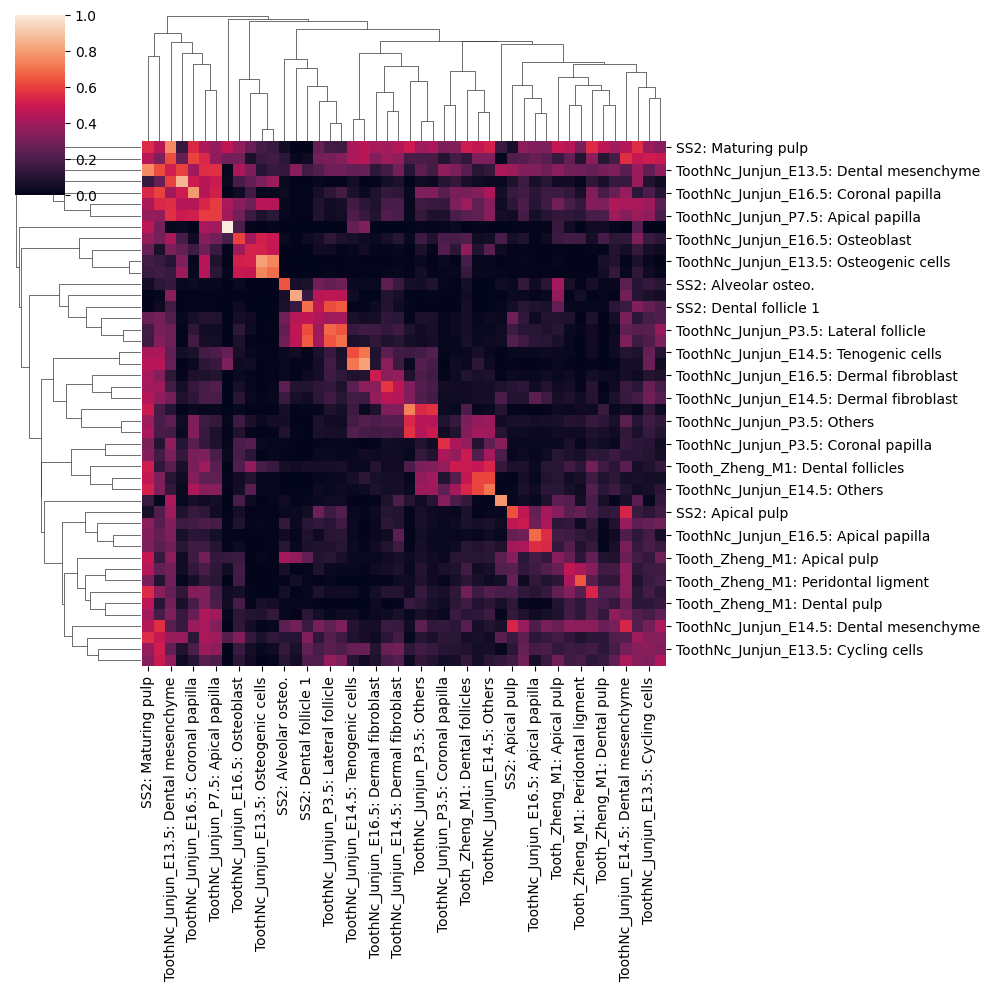

In [204]:
import seaborn as sns
sns.clustermap(member_mat)

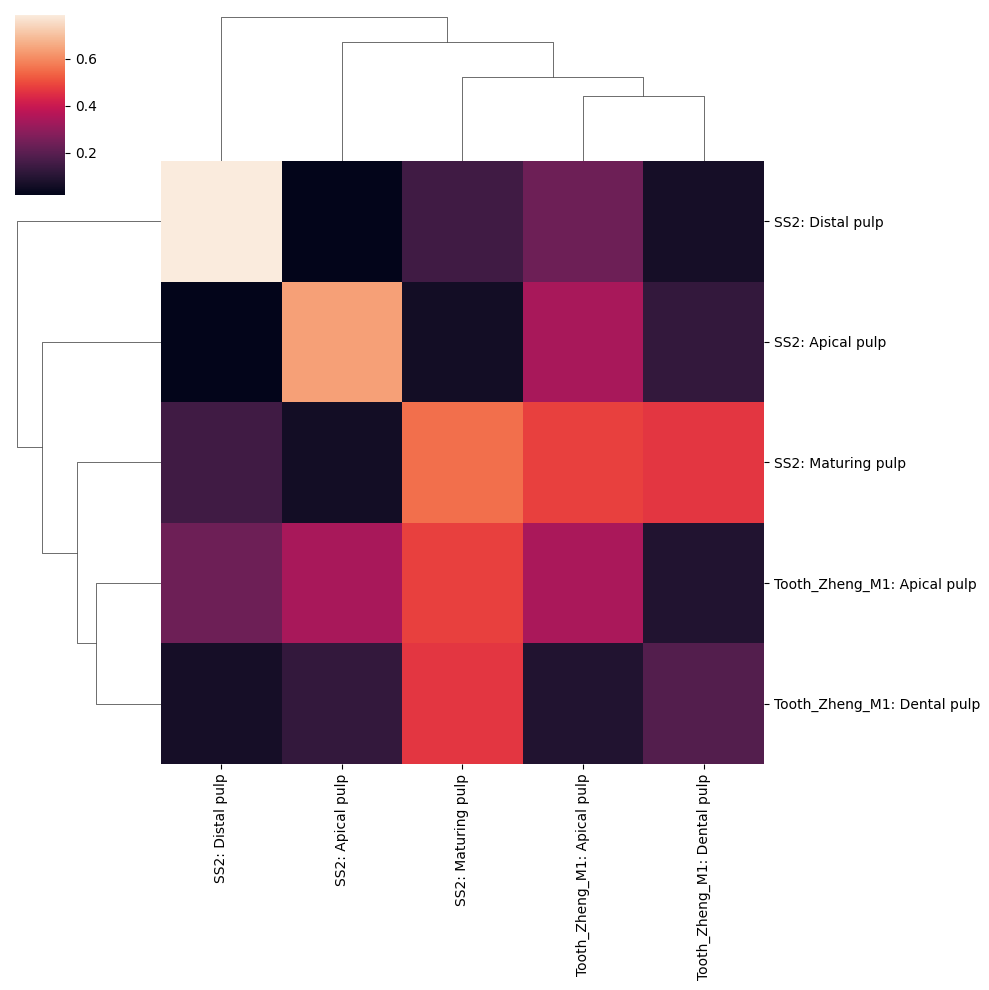

In [205]:
flag = member_mat.index.str.contains('pulp')
sns.clustermap(member_mat.loc[flag,flag])

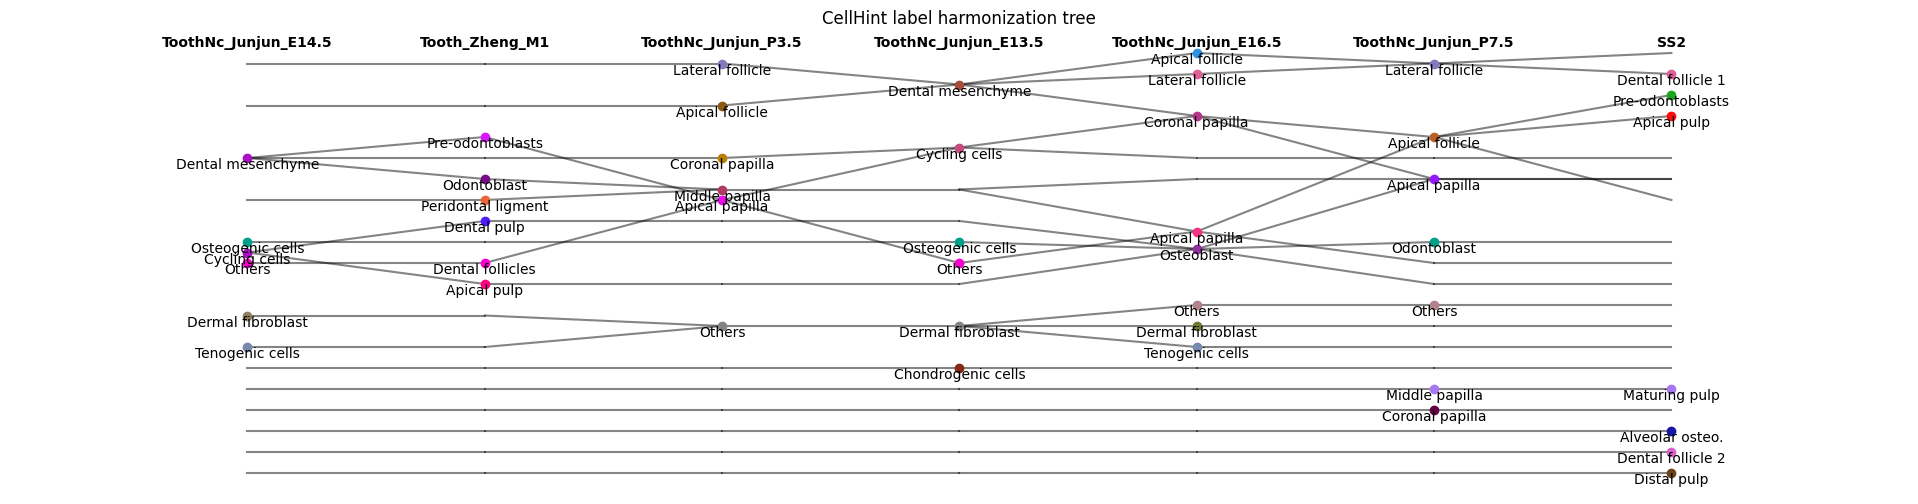

In [206]:
cellhint.treeplot(alignment)

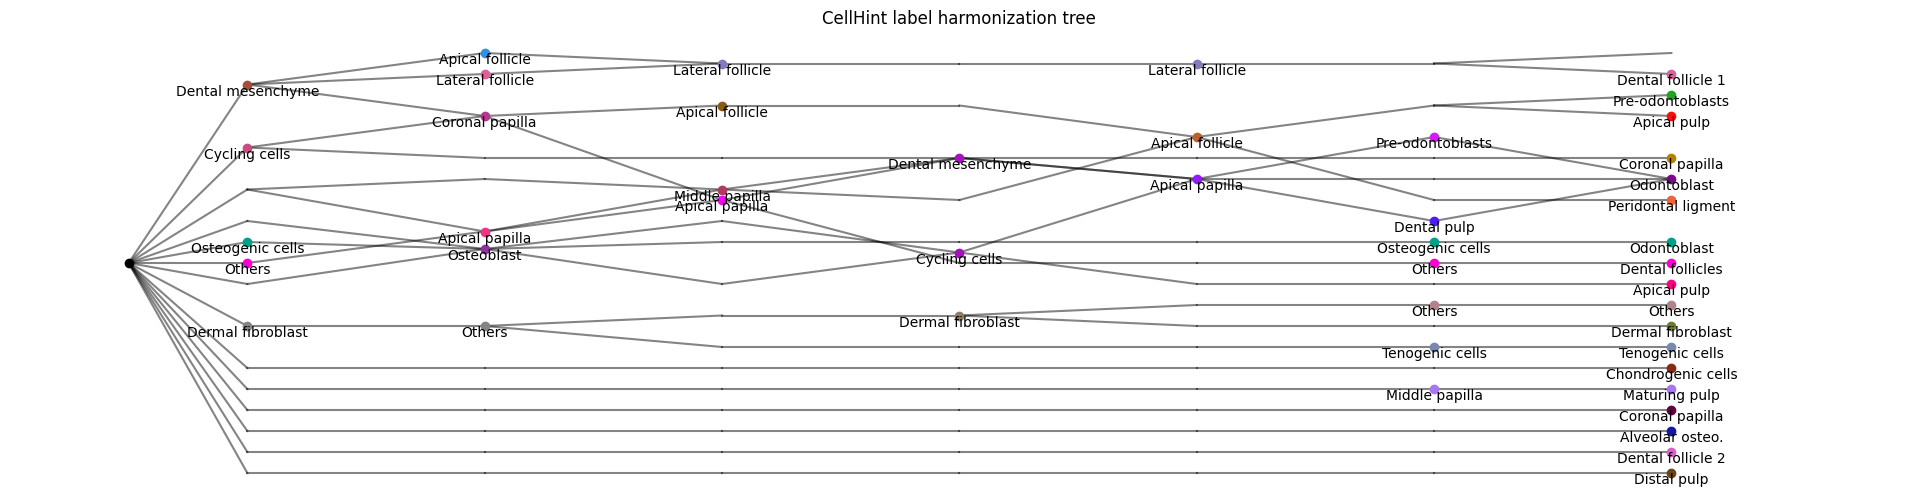

In [207]:
cellhint.treeplot(alignment, order_dataset = True)

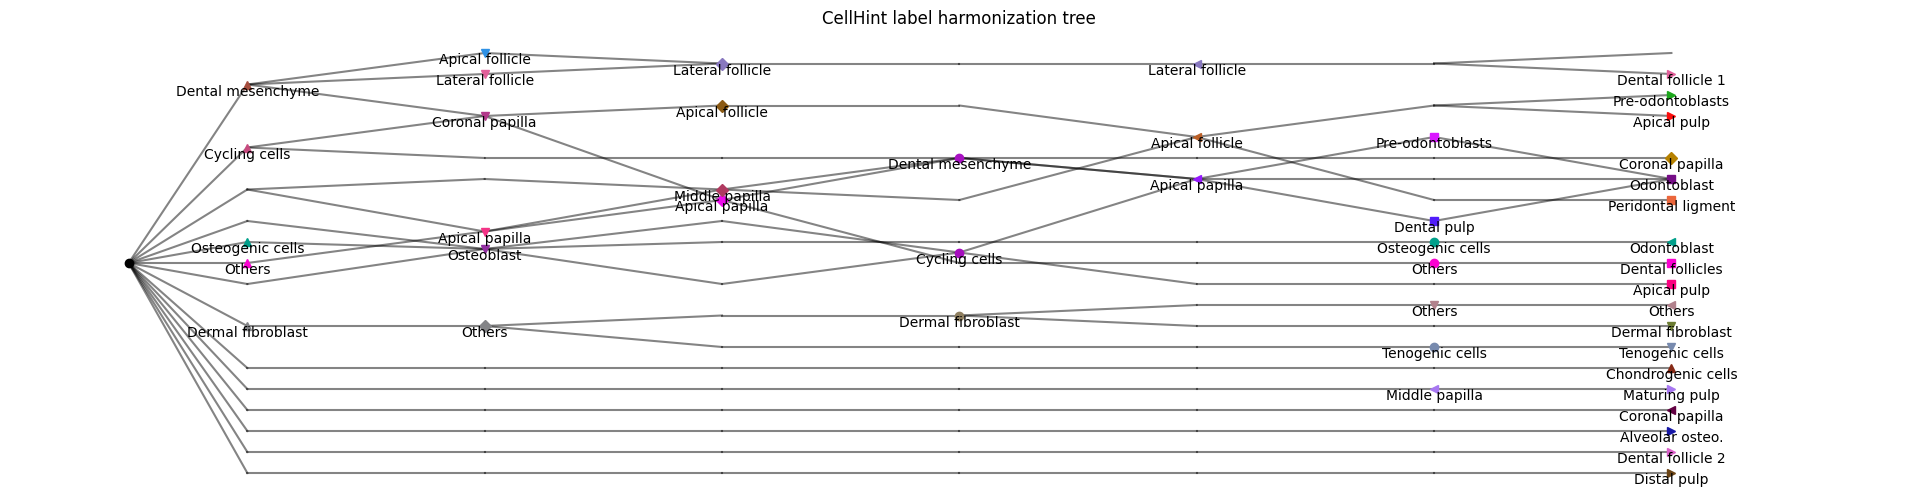

In [208]:
cellhint.treeplot(alignment, order_dataset = True, node_shape = ['o', 's', 'D', '^', 'v', '<', '>'])

In [209]:
alignment.relation.to_csv('../../process/annotation/20250114_annotation_harmonized/20250118_annotation_HT.csv', sep = ',', index = False)

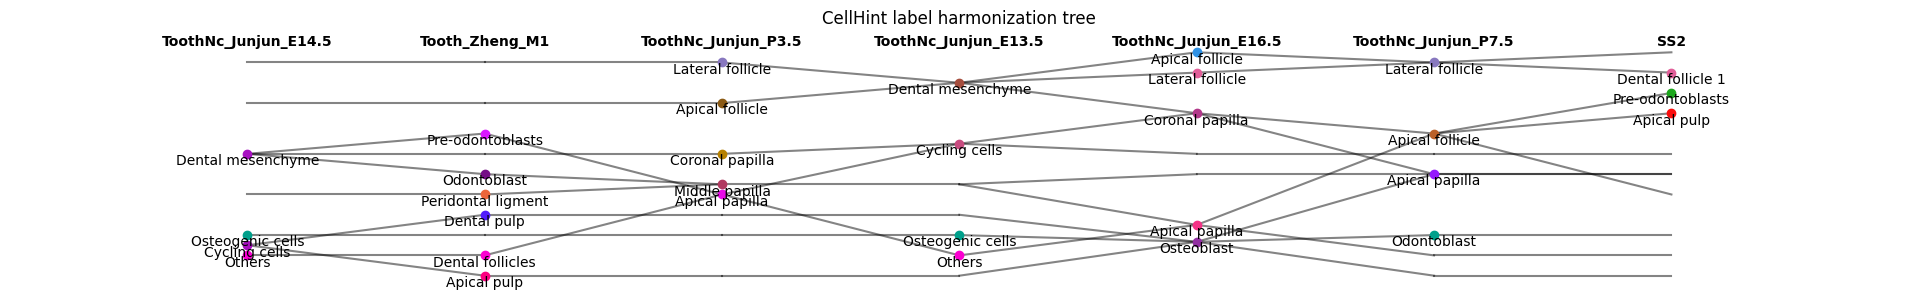

In [210]:
cellhint.treeplot(alignment.relation[alignment.groups == 'Group1'])

In [211]:
alignment.best_align(dataset_order = [
                                      'ToothNc_Junjun_E13.5','ToothNc_Junjun_E14.5', 
    'ToothNc_Junjun_E16.5','ToothNc_Junjun_P3.5', 'ToothNc_Junjun_P7.5', 'Tooth_Zheng_M1', 'SS2'])

🖇 Harmonizing cell types of ToothNc_Junjun_E13.5 and ToothNc_Junjun_E14.5
🖇 Harmonizing cell types of ToothNc_Junjun_E16.5
🖇 Harmonizing cell types of ToothNc_Junjun_P3.5
🖇 Harmonizing cell types of ToothNc_Junjun_P7.5
🖇 Harmonizing cell types of Tooth_Zheng_M1
🖇 Harmonizing cell types of SS2


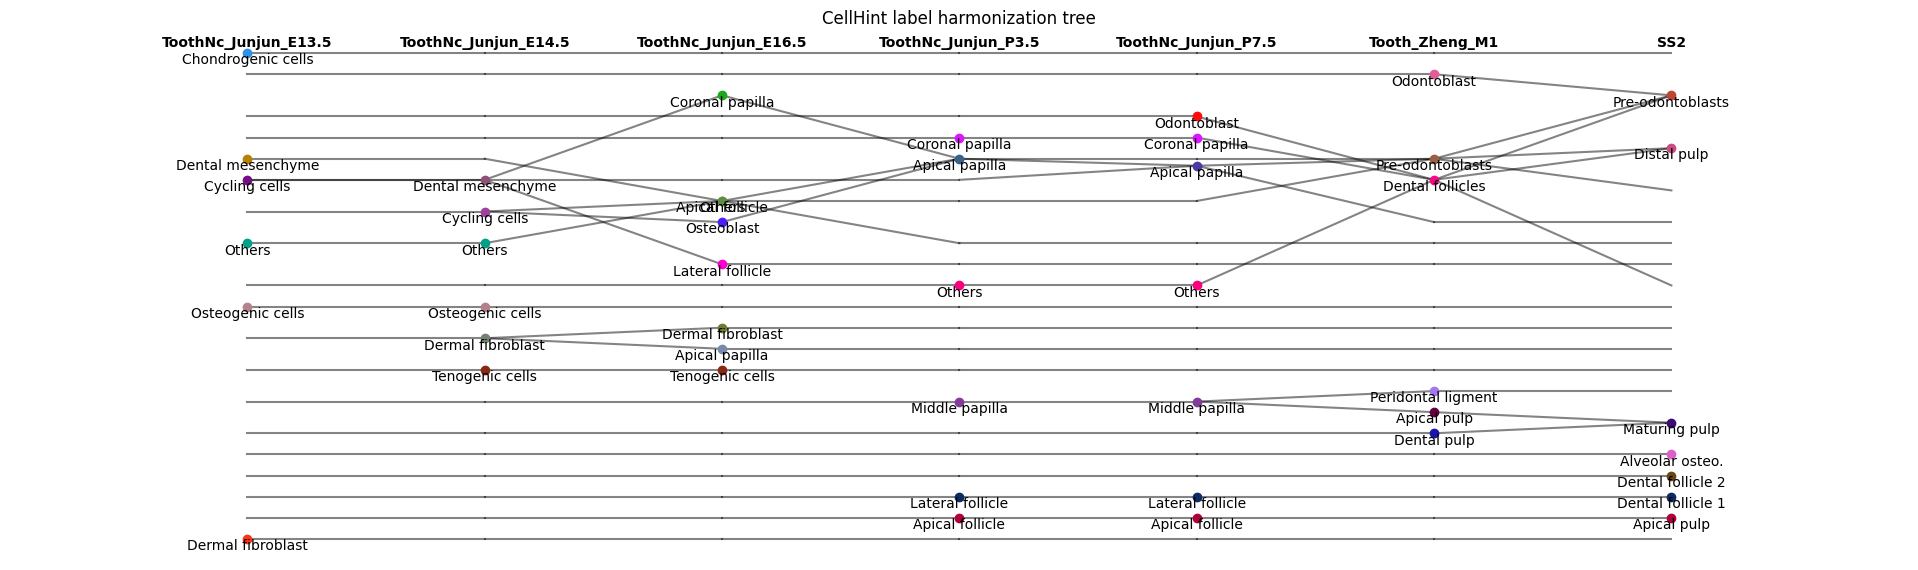

In [212]:
cellhint.treeplot(alignment,save="../../results/annotation/anno_harmonize/20250119_mes/20250120_treeplot.pdf")

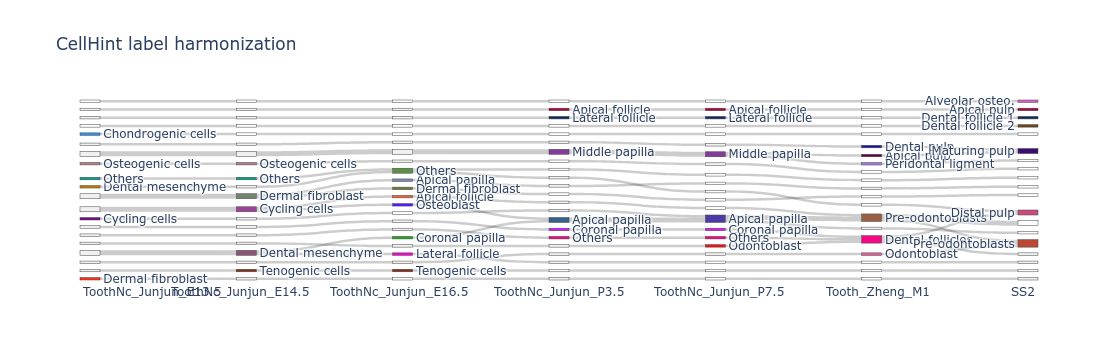

In [213]:
cellhint.sankeyplot(alignment,save="../../results/annotation/anno_harmonize/20250119_mes/20250120_sankey.pdf")